# Importing dataset

In [1]:
import zipfile
import os

In [2]:
local_zip = '/content/datasets.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content/dataset')
zip_ref.close()

In [3]:
os.chdir('/content/dataset')
base_url = '/content/dataset'

# Preprocessing

In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(rescale = 1./255., 
                             rotation_range = 40, 
                             horizontal_flip = True, 
                             validation_split=0.3,
                             fill_mode = 'nearest')

# train_datagen = ImageDataGenerator(rescale = 1./255., rotation_range = 40, horizontal_flip = True, validation_split=0.3)
# validation_datagen = ImageDataGenerator(rescale = 1.0/255.)

train_generator = datagen.flow_from_directory(
        base_url,
        classes = ['Chocolate Cake',
                    'Pasta',
                    'Pizza',
                    'Salad'],
        target_size=(128, 128),
        subset='training',
        batch_size=32,
        class_mode='categorical')

validation_generator = datagen.flow_from_directory(
        base_url,
        classes = ['Chocolate Cake',
                    'Pasta',
                    'Pizza',
                    'Salad'],
        target_size=(128, 128),
        subset='validation',
        batch_size=32,
        class_mode='categorical',
        shuffle=False)

Found 112 images belonging to 4 classes.
Found 46 images belonging to 4 classes.


# MobileNet

In [5]:
from tensorflow.keras.applications.mobilenet import MobileNet
from tensorflow.keras import layers 
import tensorflow as tf 

base_model = MobileNet(input_shape = (128, 128, 3),
include_top = False,
weights = 'imagenet')

17235968/17225924 [==============================] - 0s 0us/step


In [13]:
for layer in base_model.layers:
    layer.trainable = False

x = layers.Flatten()(base_model.output)

x = layers.Dense(512, activation='relu')(x)

x = layers.Dropout(0.1)(x)

x = layers.Dense(4, activation='softmax')(x)

model = tf.keras.models.Model(base_model.input, x)
model.compile(optimizer = tf.keras.optimizers.RMSprop(lr=0.0001), loss = 'categorical_crossentropy', metrics = ['acc'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [14]:
history = model.fit(train_generator, validation_data = validation_generator, epochs = 10)

Epoch 1/10
4/4 [==============================] - 4s 649ms/step - loss: 4.2867 - acc: 0.3304 - val_loss: 0.3797 - val_acc: 0.8913
Epoch 2/10
4/4 [==============================] - 1s 318ms/step - loss: 0.2126 - acc: 0.9286 - val_loss: 0.2441 - val_acc: 0.9130
Epoch 3/10
4/4 [==============================] - 1s 324ms/step - loss: 0.0742 - acc: 0.9643 - val_loss: 0.3079 - val_acc: 0.9130
Epoch 4/10
4/4 [==============================] - 1s 322ms/step - loss: 0.1028 - acc: 0.9464 - val_loss: 0.2317 - val_acc: 0.9130
Epoch 5/10
4/4 [==============================] - 1s 325ms/step - loss: 0.0140 - acc: 1.0000 - val_loss: 0.2219 - val_acc: 0.9130
Epoch 6/10
4/4 [==============================] - 1s 323ms/step - loss: 0.0327 - acc: 0.9911 - val_loss: 0.2216 - val_acc: 0.9348
Epoch 7/10
4/4 [==============================] - 1s 328ms/step - loss: 0.0403 - acc: 0.9732 - val_loss: 0.1619 - val_acc: 0.9348
Epoch 8/10
4/4 [==============================] - 1s 320ms/step - loss: 0.0053 - acc: 1.00

In [15]:
model.evaluate(validation_generator)

2/2 [==============================] - 0s 101ms/step - loss: 0.2101 - acc: 0.9348


[0.21010908484458923, 0.9347826242446899]

In [16]:
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 64, 64, 32)        864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 64, 64, 32)       128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 64, 64, 32)        0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 64, 64, 32)       288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 64, 64, 32)       128       
 ation)                                                    

In [17]:
STEP_SIZE_TEST=validation_generator.n//validation_generator.batch_size
validation_generator.reset()
preds = model.predict(validation_generator, verbose=1)

2/2 [==============================] - 1s 107ms/step


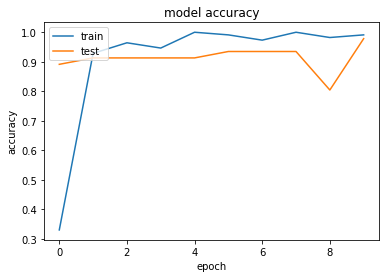

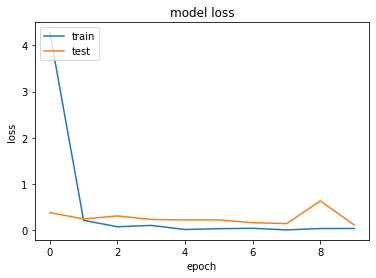

In [18]:
import matplotlib.pyplot as plt

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Saving 037_aaaecf1a.jpg to 037_aaaecf1a.jpg
[9.8170359e-03 3.1051391e-01 6.7941082e-01 2.5829847e-04]
Pizza


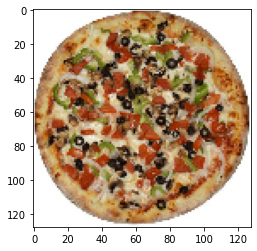

In [28]:
label = ['Chocolate Cake',
'Pasta',
'Pizza',
'Salad']

%matplotlib inline
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
  # predicting images
  path = '/content/dataset/' + fn
  img = image.load_img(path, target_size=(128, 128))
  x = image.img_to_array(img)
  plt.imshow(x/255.)
  x = np.expand_dims(x, axis=0)
  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(classes[0])
  print(label[np.argmax(classes[0])])

# TFLite 1



In [44]:
RPS_SAVED_MODEL = "rps_saved_model"

tf.saved_model.save(model, RPS_SAVED_MODEL)

INFO:tensorflow:Assets written to: rps_saved_model/assets


INFO:tensorflow:Assets written to: rps_saved_model/assets


In [45]:
%%bash -s $RPS_SAVED_MODEL
saved_model_cli show --dir $1 --tag_set serve --signature_def serving_default

The given SavedModel SignatureDef contains the following input(s):
  inputs['input_1'] tensor_info:
      dtype: DT_FLOAT
      shape: (-1, 128, 128, 3)
      name: serving_default_input_1:0
The given SavedModel SignatureDef contains the following output(s):
  outputs['dense_5'] tensor_info:
      dtype: DT_FLOAT
      shape: (-1, 4)
      name: StatefulPartitionedCall:0
Method name is: tensorflow/serving/predict


In [46]:
loaded = tf.saved_model.load(RPS_SAVED_MODEL)

print(list(loaded.signatures.keys()))
infer = loaded.signatures["serving_default"]
print(infer.structured_input_signature)
print(infer.structured_outputs)

['serving_default']
((), {'input_1': TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name='input_1')})
{'dense_5': TensorSpec(shape=(None, 4), dtype=tf.float32, name='dense_5')}


In [47]:
converter = tf.lite.TFLiteConverter.from_saved_model(RPS_SAVED_MODEL)
converter.optimizations = [tf.lite.Optimize.OPTIMIZE_FOR_SIZE]
tflite_model = converter.convert()

In [48]:
tflite_model_file = 'converted_model.tflite'

with open(tflite_model_file, "wb") as f:
    f.write(tflite_model)

In [49]:
try:
    from google.colab import files
    files.download('converted_model.tflite')
    files.download('labels.txt')
except:
    pass

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Predict on new data

1196032/1181113 [==============================] - 0s 0us/step
This image most likely belongs to Pasta with a 34.87 percent confidence.


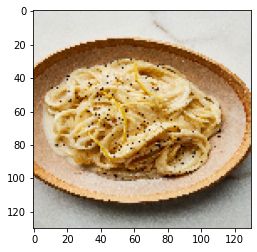

In [40]:
classes = ['Chocolate Cake',
'Pasta',
'Pizza',
'Salad']

food_url = "https://assets.bonappetit.com/photos/5b9a901947aaaf7cd9ea90f2/2:3/w_1874,h_2811,c_limit/ba-recipe-pasta-al-limone.jpg"
food_path = tf.keras.utils.get_file(origin=food_url)

img = tf.keras.utils.load_img(food_path, target_size=(130, 130))
plt.imshow(img)

img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(classes[np.argmax(score)], 100 * np.max(score))
)

# TFLite 2 (via md5)

In [41]:
# Download .h5 file
output_dir =  '/content/'
model.save(output_dir + 'model.h5')

print('Trained Model saved at {}'.format(output_dir))

Trained Model saved at /content/


In [42]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()
with open('model.tflite', 'wb') as f:
  f.write(tflite_model)

INFO:tensorflow:Assets written to: /tmp/tmpa60pif_n/assets


INFO:tensorflow:Assets written to: /tmp/tmpa60pif_n/assets


# Deploy on GCP

In [43]:
# Should use .pb format
model.save('/content/') 

INFO:tensorflow:Assets written to: /content/assets


INFO:tensorflow:Assets written to: /content/assets
